<a href="https://colab.research.google.com/github/pvlakshm/AIML/blob/main/Fruits/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# The goal of this exercise is to learn the slope and intercept of a line that
# passes through a set of points that we define.

# Step 0: get the data file into the Colab environment
import urllib.request

url = 'https://raw.githubusercontent.com/pvlakshm/AIML/refs/heads/main/Fruits/fruits.xlsx'
filename = 'fruits.xlsx'
urllib.request.urlretrieve(url, filename)

('fruits.xlsx', <http.client.HTTPMessage at 0x7d9fa44a5390>)

In [3]:
# Step 1: read in the data into a dataframe
import pandas as pd
df = pd.read_excel('fruits.xlsx')
df.head()

,Weight,Texture,Fruit
0,150,Smooth,Apple
1,151,Smooth,Apple
2,154,Smooth,Apple
3,152,Smooth,Apple
4,157,Smooth,Apple


In [4]:
# Step 2: encode the categorical data
from sklearn.preprocessing import LabelEncoder
# Encode the 'Texture' and 'Fruit' columns inplace
textureEncoder = LabelEncoder()
df['Texture']  = textureEncoder.fit_transform(df['Texture'])

# Use a separete encoder for Fruit, since later on we will need to
# decode a predicted fruit using this same encoder.
fruitEncoder   = LabelEncoder()
df['Fruit']    = fruitEncoder.fit_transform(df['Fruit'])

df.head()

,Weight,Texture,Fruit
0,150,1,0
1,151,1,0
2,154,1,0
3,152,1,0
4,157,1,0


In [5]:
# Step 3: form our X and y
X = df[['Weight', 'Texture']].values
y = df['Fruit'].values

In [6]:
# Step 4: train the model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [7]:
# Step 5: create a sample for prediction
Weight = 154
tt = textureEncoder.transform(["Smooth"])
Texture = tt[0]
X_test = [[Weight, Texture]]
print(X_test)

[[154, np.int64(1)]]


In [8]:
# Step 6: predict
y_pred = clf.predict(X_test)

# Decode to label
print(fruitEncoder.inverse_transform(y_pred))

['Apple']


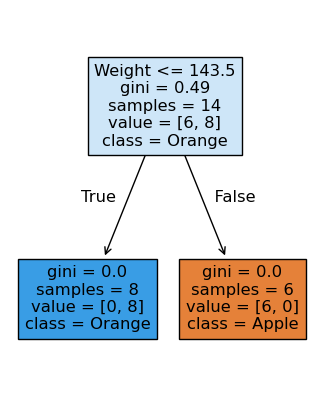

In [9]:
# Step 7: Visualize the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(4, 5))
plot_tree(clf, feature_names=["Weight", "Texture"], class_names=["Apple", "Orange"], filled=True)
plt.show()
